In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

#### Application Data

In [3]:
app.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ab = app.isnull().sum()*100/app.shape[0]  #Finding out null values

In [6]:
ab = ab[ab > 20] #Finding all columns where null values >20%
ab = pd.DataFrame(ab)
ab.index 

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [7]:
app.drop(columns = ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', #dropping columns where null value percentage greater than 20%
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],inplace = True)

In [8]:
ab = app.isnull().sum()*100/app.shape[0] 
ab[ab > 0 ]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

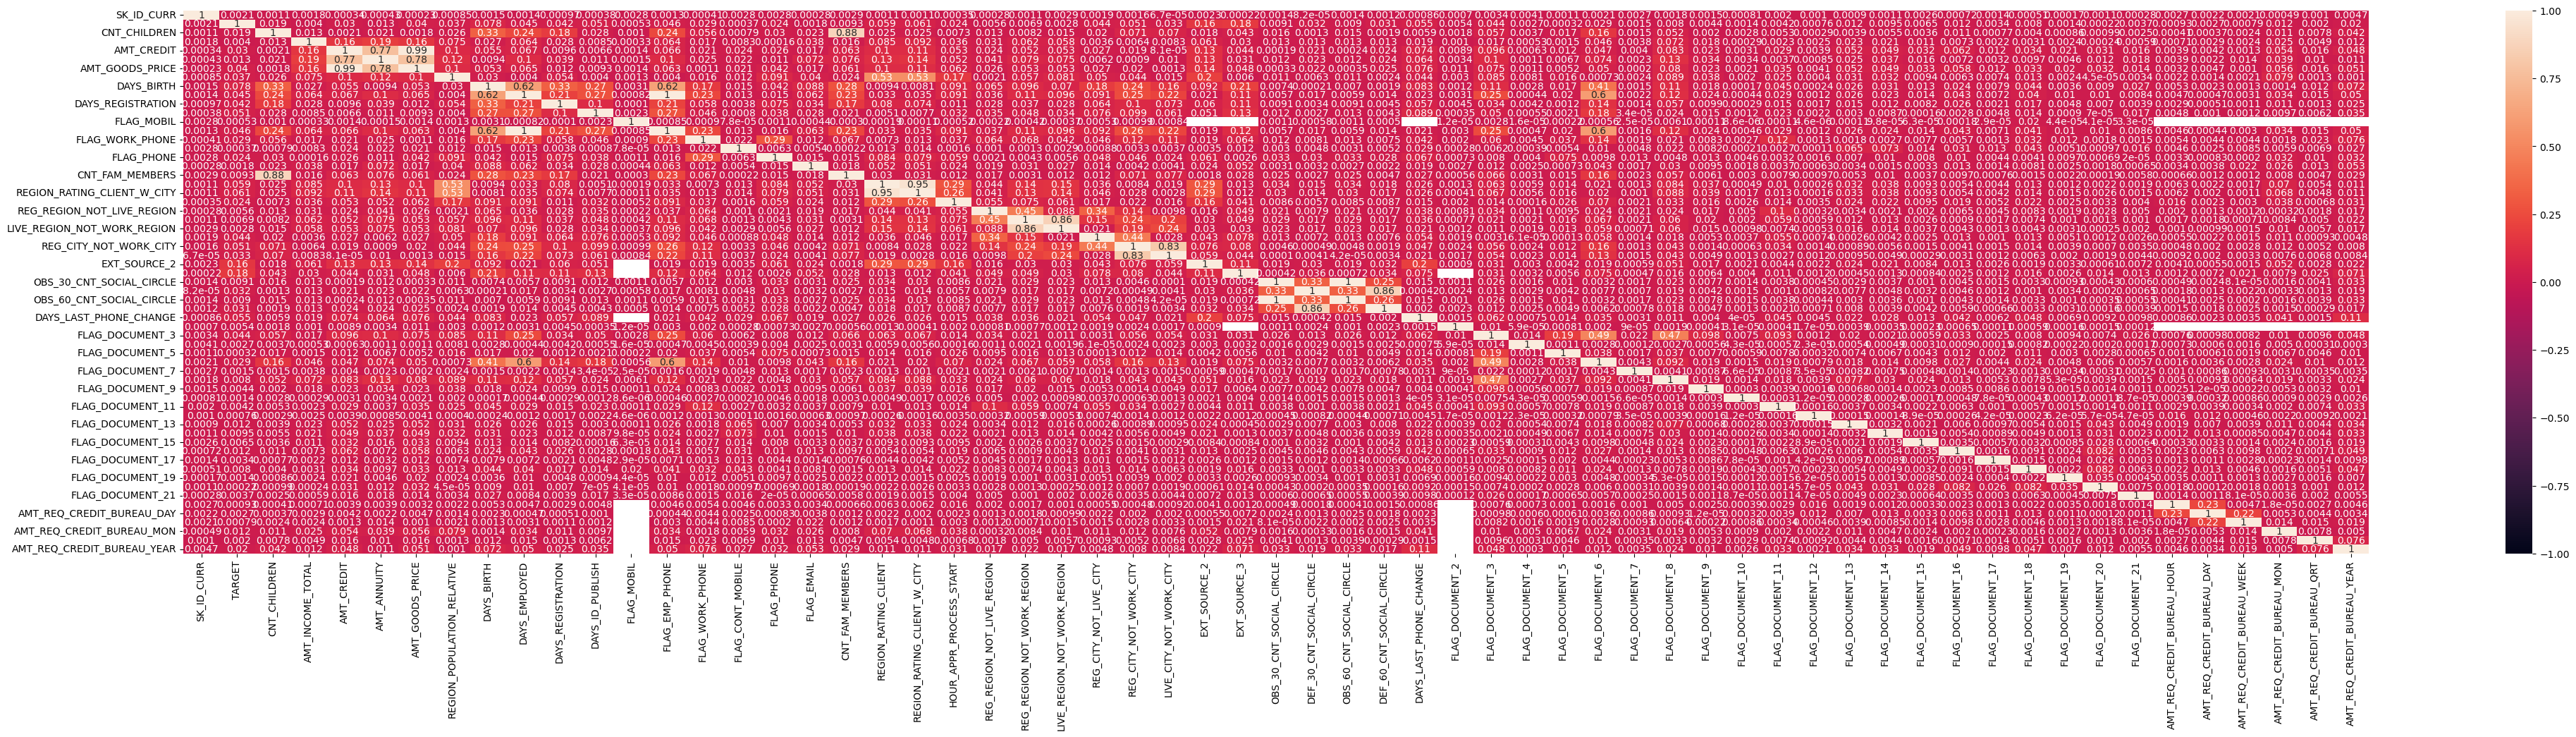

In [9]:
plt.figure(figsize = (50,10)) # Finding correlation of columns
sns.heatmap(app.select_dtypes(['float','int']).corr().abs(),annot=True,vmin=-1,vmax=1)
plt.show()

In [10]:
app.drop(columns = ['CNT_FAM_MEMBERS','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY',
                    'DEF_30_CNT_SOCIAL_CIRCLE',],inplace = True) #Dropping all the columns where where correlation is >= 0.80 and <= 0.80

In [11]:
app.shape

(307511, 66)

In [12]:
#finding all columns where null value % between 0-2
ab = app.isnull().sum()*100/app.shape[0] 
ab2 = ab[(ab>0)&(ab < 2)]
ab2 = pd.DataFrame(ab2)
ab2.index

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [13]:
ab1 = ab[ab > 2] #finding all columns where null value % between 2-20
ab1

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [14]:
ab1 = pd.DataFrame(ab1)
ab1.index

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [15]:
# seperating continuous and categorical columns on the basis of knowledge

In [16]:
# For Continuous variable 
for i in ['EXT_SOURCE_3','AMT_ANNUITY','EXT_SOURCE_2']:
    app[i].fillna(value = app[i].mean(),inplace = True)

In [17]:
# For Categorical variable
for i in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE',
           'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']:
    app[i].fillna(value = app[i].mode().iloc[0],inplace = True)

In [18]:
app.shape

(307511, 66)

In [19]:
# Saving cleaned data into csv file

In [20]:
app.to_csv('application_new.csv',index = False)

#### Previous Application

In [22]:
prev = pd.read_csv('previous_application.csv')

In [23]:
prev.shape

(1670214, 37)

In [26]:
prev.head().T

,0,1,2,3,4
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265
SK_ID_CURR,271877,108129,122040,176158,202054
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.615,15060.735,47041.335,31924.395
AMT_APPLICATION,17145.0,607500.0,112500.0,450000.0,337500.0
AMT_CREDIT,17145.0,679671.0,136444.5,470790.0,404055.0
AMT_DOWN_PAYMENT,0.0,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145.0,607500.0,112500.0,450000.0,337500.0
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9


In [31]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [32]:
prev.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [33]:
prev.describe(include='object').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


In [34]:
prev.duplicated().sum()

0

In [35]:
##  Checking missing values

In [36]:
prev.isnull().sum()*100/prev.shape[0]>20

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_ANNUITY                     True
AMT_APPLICATION                False
AMT_CREDIT                     False
AMT_DOWN_PAYMENT                True
AMT_GOODS_PRICE                 True
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
RATE_DOWN_PAYMENT               True
RATE_INTEREST_PRIMARY           True
RATE_INTEREST_PRIVILEGED        True
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
N

In [37]:
prev=prev.drop(columns=["AMT_ANNUITY","AMT_DOWN_PAYMENT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE",
                       "RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED",
                       "NAME_TYPE_SUITE","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE",
                       "DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION",
                       "NFLAG_INSURED_ON_APPROVAL"           
                       ]) ## Null values >20%

In [38]:
prev.shape

(1670214, 23)

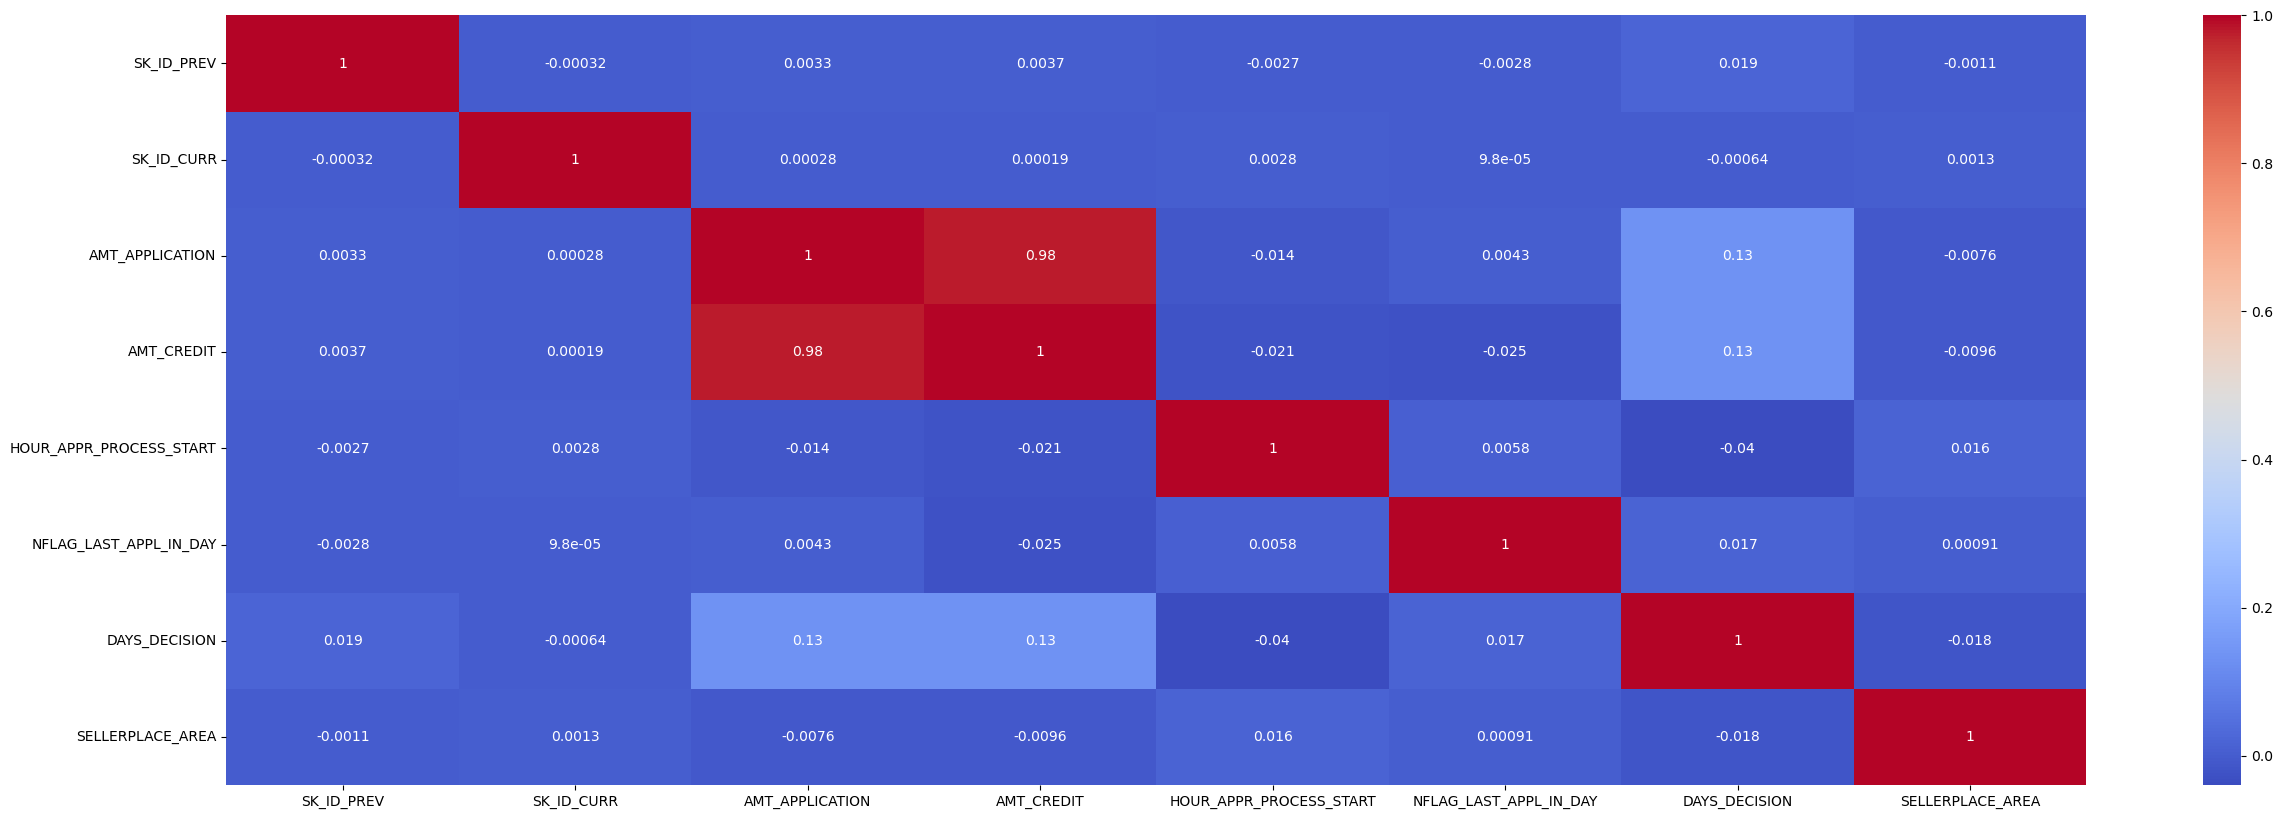

In [39]:
plt.figure(figsize=(30,10))
corr_matrix = prev.select_dtypes(include="number").corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [40]:
prev=prev.drop(columns=["AMT_APPLICATION"]) ## highly correlate with AMT_CREDIT

In [41]:
prev.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_CREDIT                       86803
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION                 17
dtype: int64

In [42]:
prev.isnull().sum()*100/prev.shape[0]==0

SK_ID_PREV                      True
SK_ID_CURR                      True
NAME_CONTRACT_TYPE              True
AMT_CREDIT                     False
WEEKDAY_APPR_PROCESS_START      True
HOUR_APPR_PROCESS_START         True
FLAG_LAST_APPL_PER_CONTRACT     True
NFLAG_LAST_APPL_IN_DAY          True
NAME_CASH_LOAN_PURPOSE          True
NAME_CONTRACT_STATUS            True
DAYS_DECISION                   True
NAME_PAYMENT_TYPE               True
CODE_REJECT_REASON              True
NAME_CLIENT_TYPE                True
NAME_GOODS_CATEGORY             True
NAME_PORTFOLIO                  True
NAME_PRODUCT_TYPE               True
CHANNEL_TYPE                    True
SELLERPLACE_AREA                True
NAME_SELLER_INDUSTRY            True
NAME_YIELD_GROUP                True
PRODUCT_COMBINATION            False
dtype: bool

####  Handle missing values

In [44]:
## continous variable
prev["AMT_CREDIT"]=prev["AMT_CREDIT"].fillna(prev["AMT_CREDIT"].mean())

In [45]:
## categorical Variable
prev["PRODUCT_COMBINATION"]=prev["PRODUCT_COMBINATION"].fillna(prev["PRODUCT_COMBINATION"].mode().iloc[0])

In [46]:
prev.isnull().sum()*100/prev.shape[0]==0

SK_ID_PREV                     True
SK_ID_CURR                     True
NAME_CONTRACT_TYPE             True
AMT_CREDIT                     True
WEEKDAY_APPR_PROCESS_START     True
HOUR_APPR_PROCESS_START        True
FLAG_LAST_APPL_PER_CONTRACT    True
NFLAG_LAST_APPL_IN_DAY         True
NAME_CASH_LOAN_PURPOSE         True
NAME_CONTRACT_STATUS           True
DAYS_DECISION                  True
NAME_PAYMENT_TYPE              True
CODE_REJECT_REASON             True
NAME_CLIENT_TYPE               True
NAME_GOODS_CATEGORY            True
NAME_PORTFOLIO                 True
NAME_PRODUCT_TYPE              True
CHANNEL_TYPE                   True
SELLERPLACE_AREA               True
NAME_SELLER_INDUSTRY           True
NAME_YIELD_GROUP               True
PRODUCT_COMBINATION            True
dtype: bool

In [47]:
# Saving cleaned data into csv file
prev.to_csv('previous_new.csv',index = False)

# Predictive Modelling

In [2]:
app = pd.read_csv('application_new.csv')

In [3]:
app.shape

(307511, 66)

#### Handling & Detection of Null Value

In [6]:
[app.isnull().sum() > 0 ] == True

False

In [7]:
app.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [8]:
app = app.replace('XNA','F')

In [9]:
app.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

#### Handling & Detection of Duplicate Value

In [11]:
app.duplicated().sum()

0

#### Feature Reduction

In [13]:
for i in app.columns:
    ab = app[i].nunique()
    print(f'{i} =',ab)

SK_ID_CURR = 307511
TARGET = 2
NAME_CONTRACT_TYPE = 2
CODE_GENDER = 2
FLAG_OWN_CAR = 2
FLAG_OWN_REALTY = 2
CNT_CHILDREN = 15
AMT_INCOME_TOTAL = 2548
AMT_CREDIT = 5603
AMT_ANNUITY = 13673
NAME_TYPE_SUITE = 7
NAME_INCOME_TYPE = 8
NAME_EDUCATION_TYPE = 5
NAME_FAMILY_STATUS = 6
NAME_HOUSING_TYPE = 6
REGION_POPULATION_RELATIVE = 81
DAYS_BIRTH = 17460
DAYS_EMPLOYED = 12574
DAYS_REGISTRATION = 15688
DAYS_ID_PUBLISH = 6168
FLAG_MOBIL = 2
FLAG_EMP_PHONE = 2
FLAG_WORK_PHONE = 2
FLAG_CONT_MOBILE = 2
FLAG_PHONE = 2
FLAG_EMAIL = 2
REGION_RATING_CLIENT = 3
WEEKDAY_APPR_PROCESS_START = 7
HOUR_APPR_PROCESS_START = 24
REG_REGION_NOT_LIVE_REGION = 2
LIVE_REGION_NOT_WORK_REGION = 2
REG_CITY_NOT_LIVE_CITY = 2
REG_CITY_NOT_WORK_CITY = 2
ORGANIZATION_TYPE = 58
EXT_SOURCE_2 = 119832
EXT_SOURCE_3 = 815
OBS_30_CNT_SOCIAL_CIRCLE = 33
OBS_60_CNT_SOCIAL_CIRCLE = 33
DEF_60_CNT_SOCIAL_CIRCLE = 9
DAYS_LAST_PHONE_CHANGE = 3773
FLAG_DOCUMENT_2 = 2
FLAG_DOCUMENT_3 = 2
FLAG_DOCUMENT_4 = 2
FLAG_DOCUMENT_5 = 2
FLAG_DOCUME

In [14]:
app.drop(columns = ['SK_ID_CURR'],inplace = True)

#### Correlation Check 

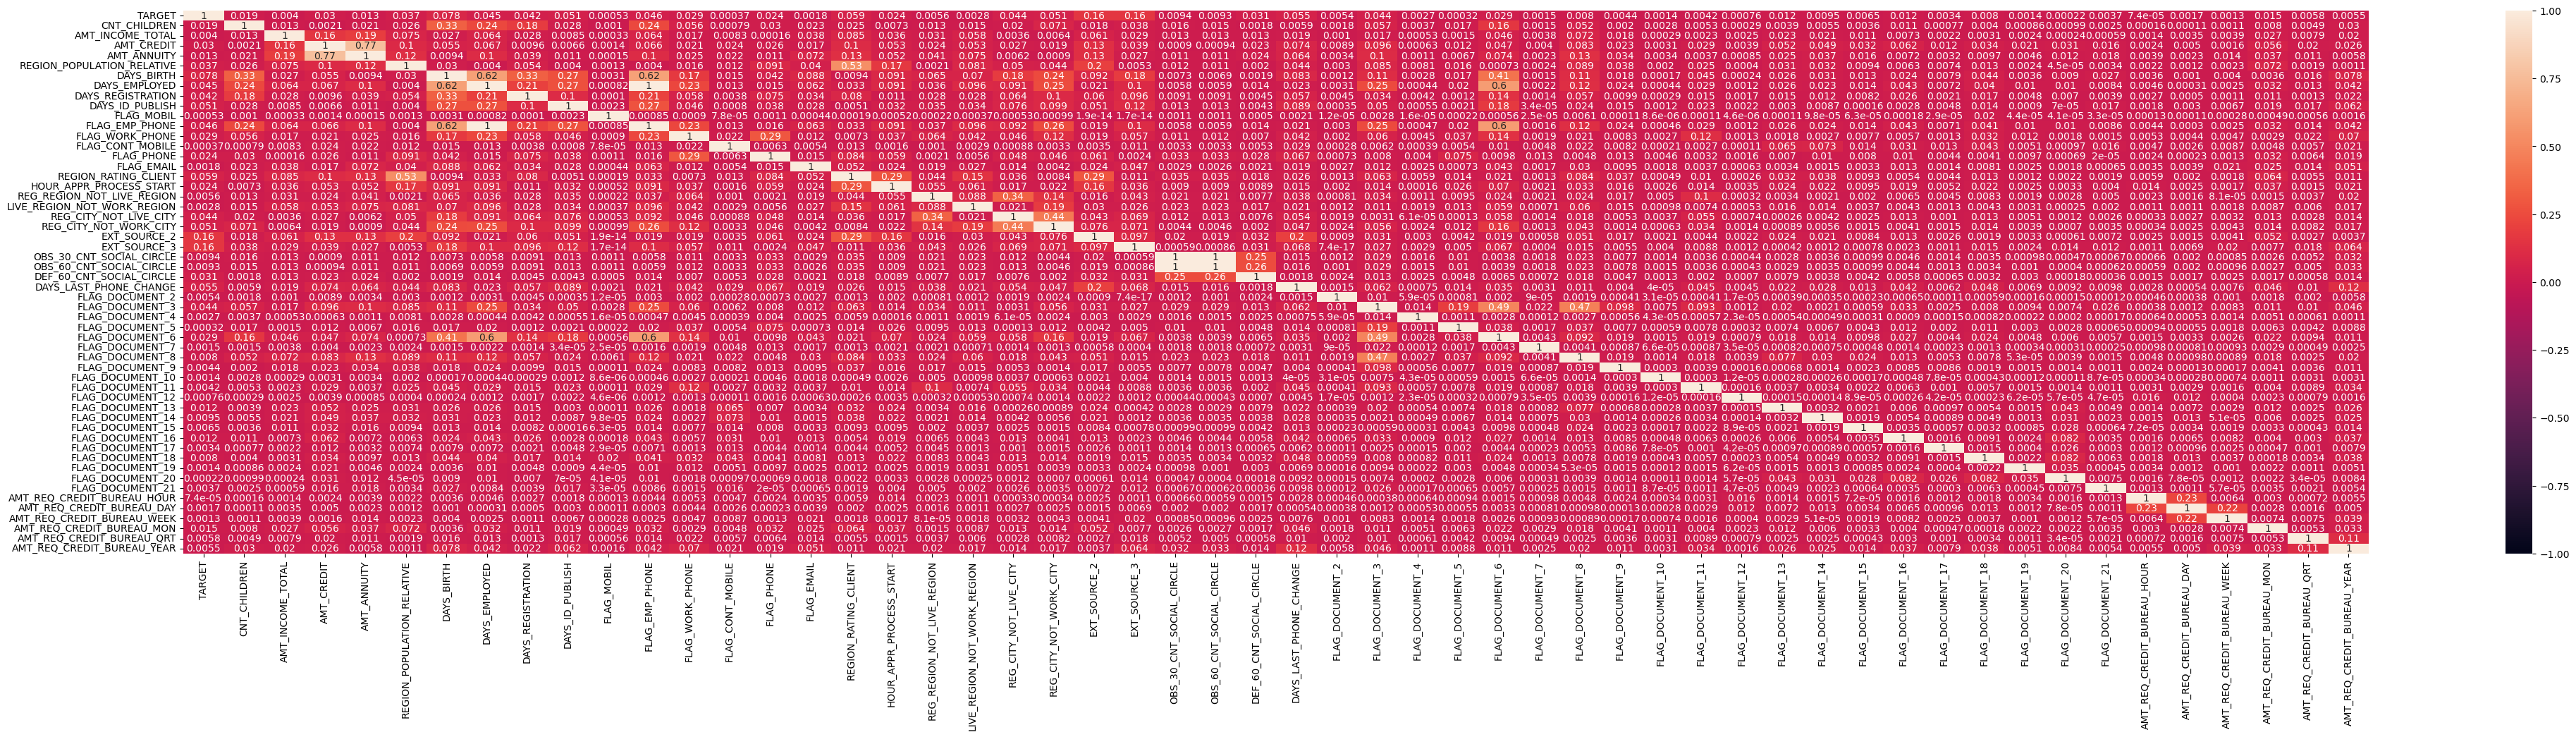

In [16]:
plt.figure(figsize = (50,10)) # Finding correlation of columns (>0.80 and <-0.80)
sns.heatmap(app.select_dtypes(['float','int']).corr().abs(),annot=True,vmin=-1,vmax=1)
plt.show()

In [17]:
app = app.drop(columns = 'OBS_30_CNT_SOCIAL_CIRCLE')

#### Outlier identification and handling

In [19]:
def plot_(x):
    x.plot(kind = 'box')
    plt.show()

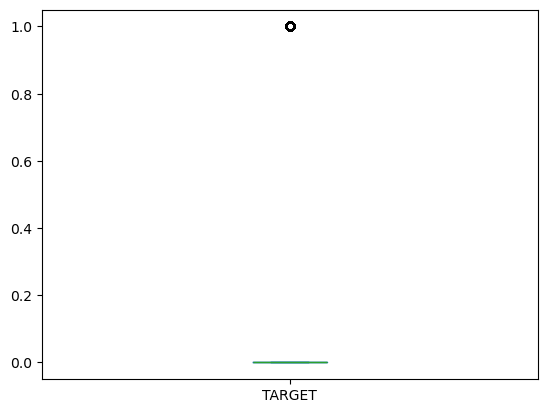

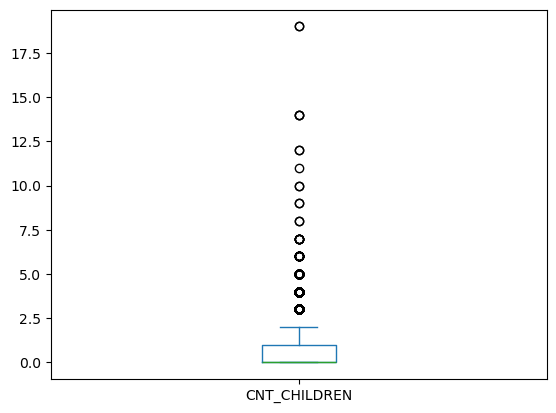

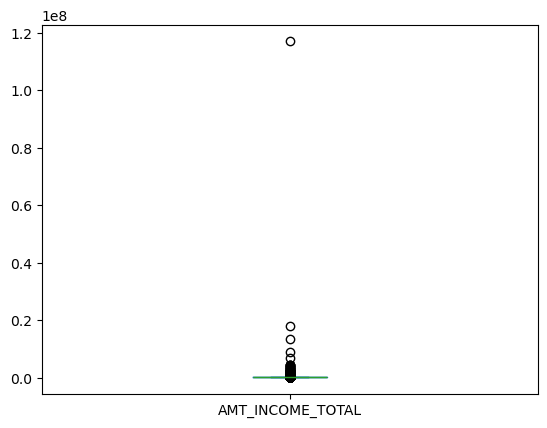

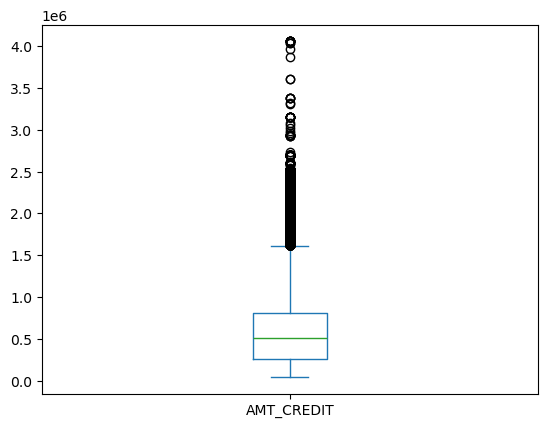

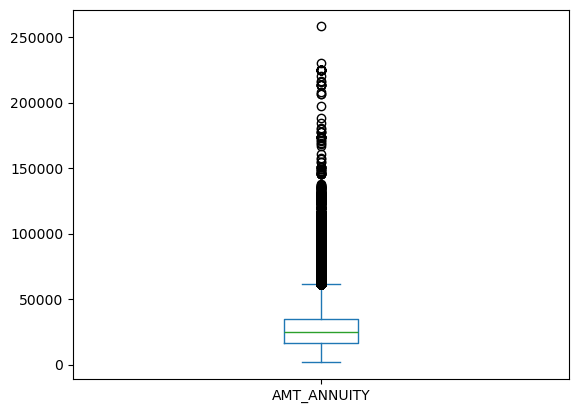

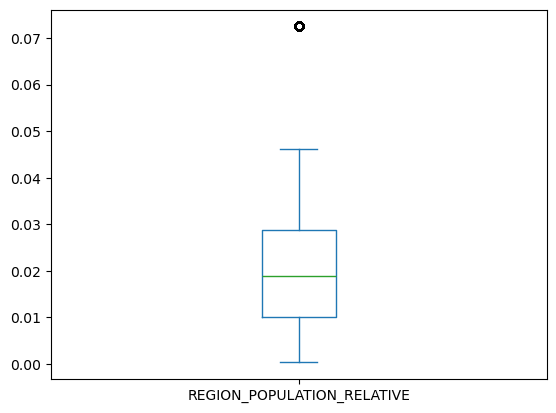

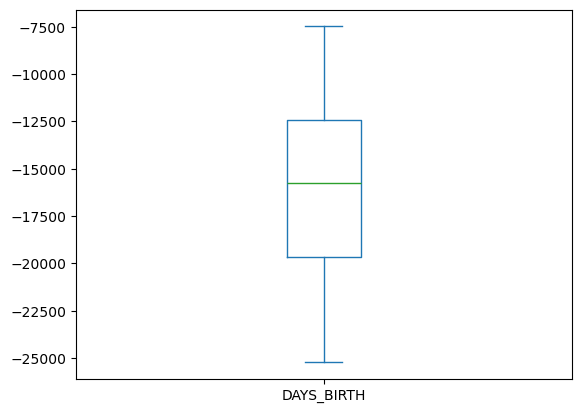

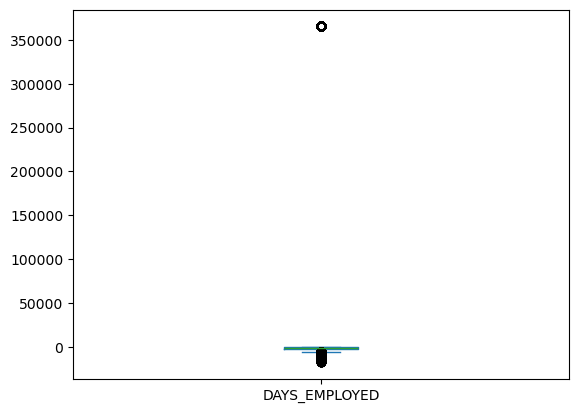

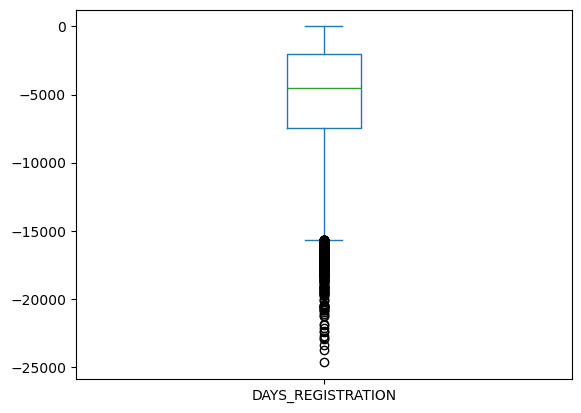

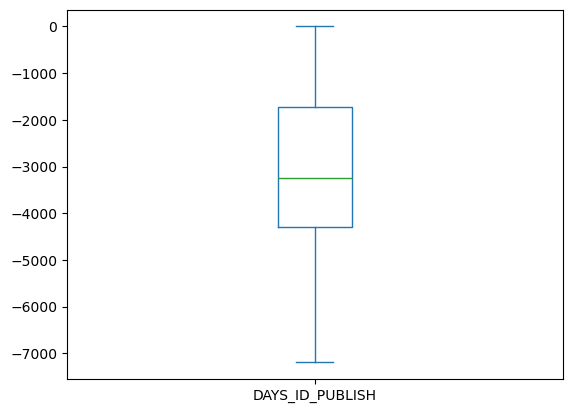

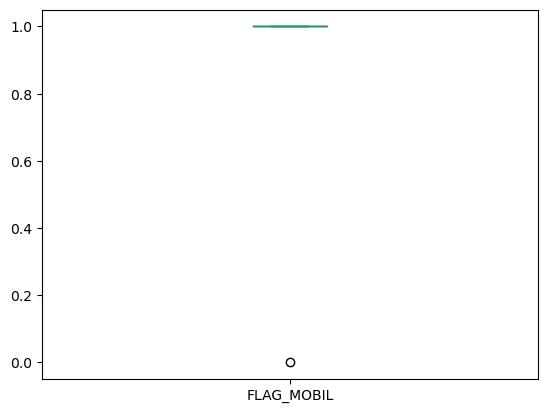

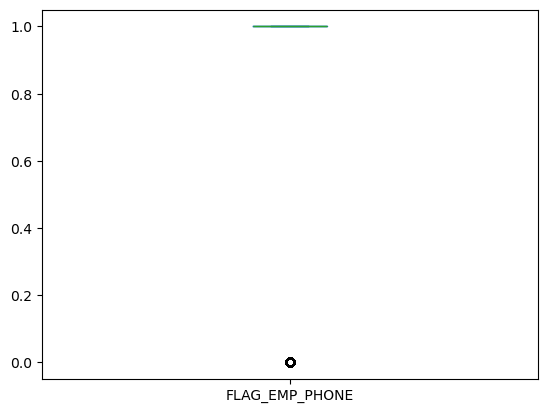

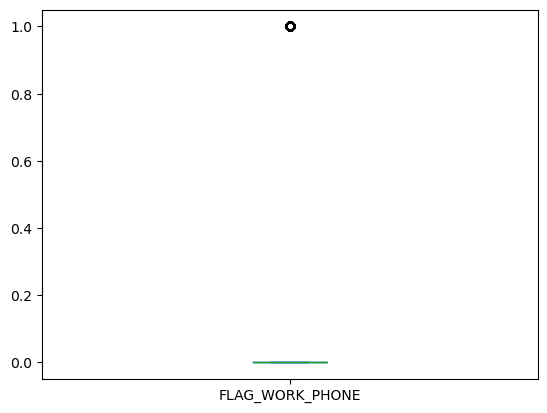

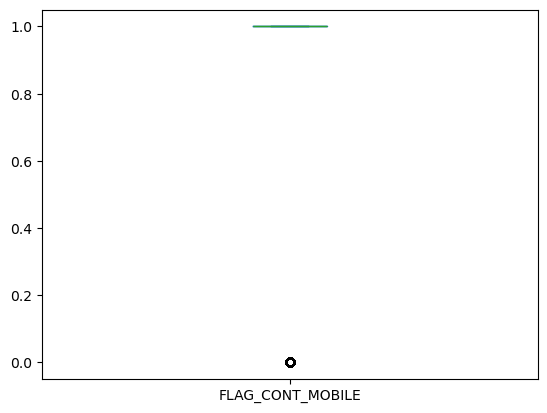

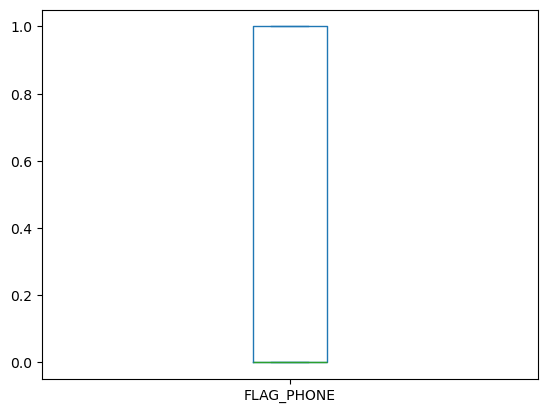

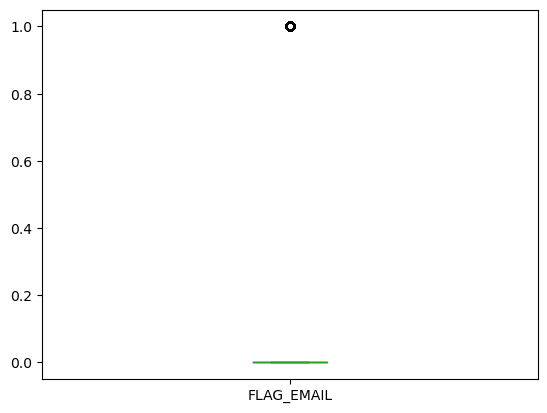

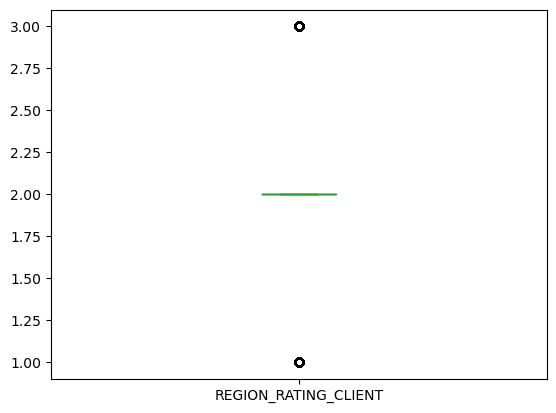

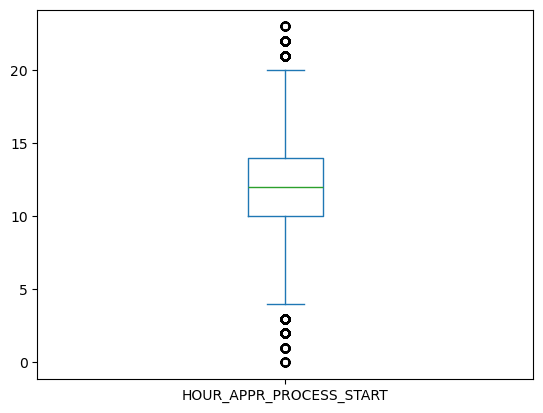

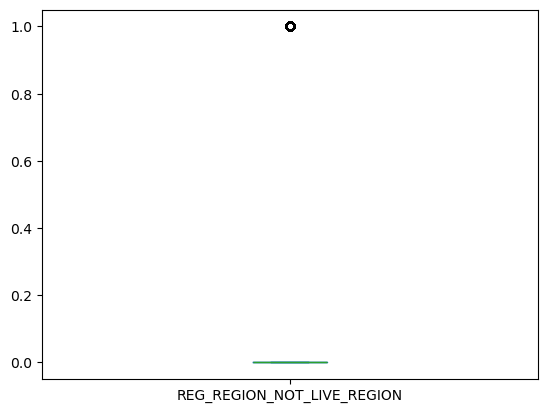

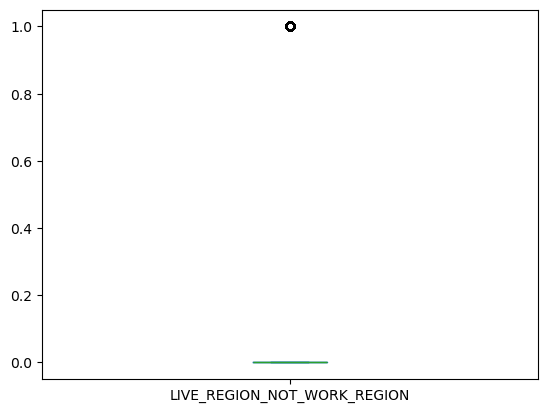

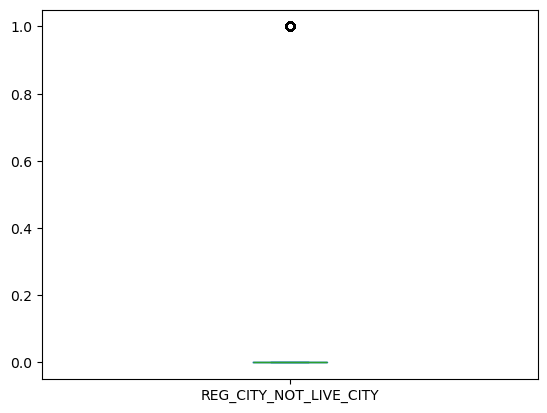

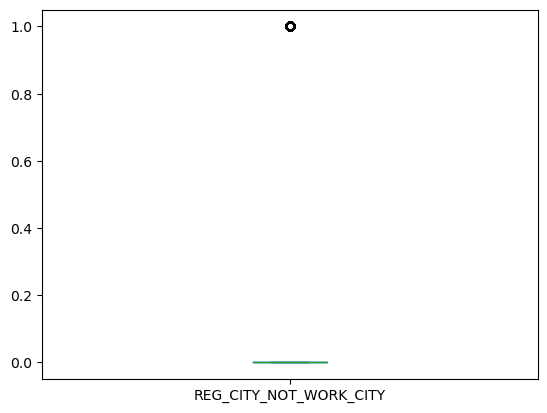

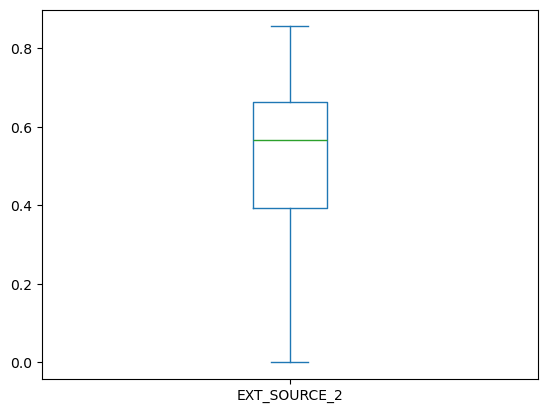

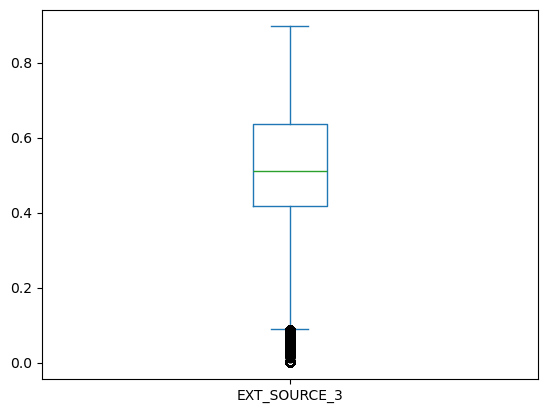

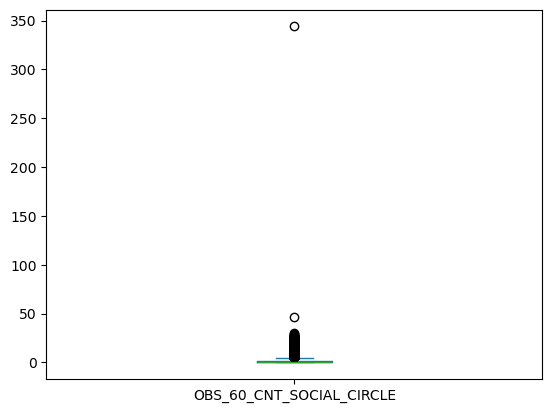

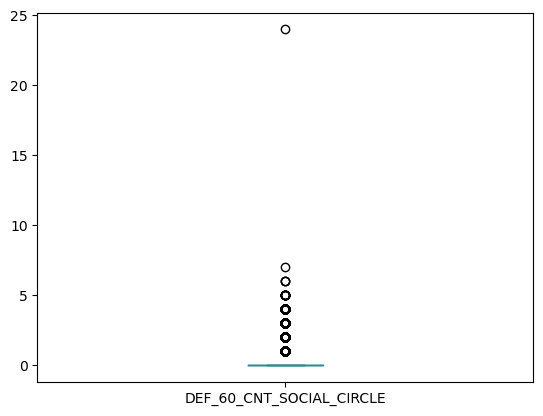

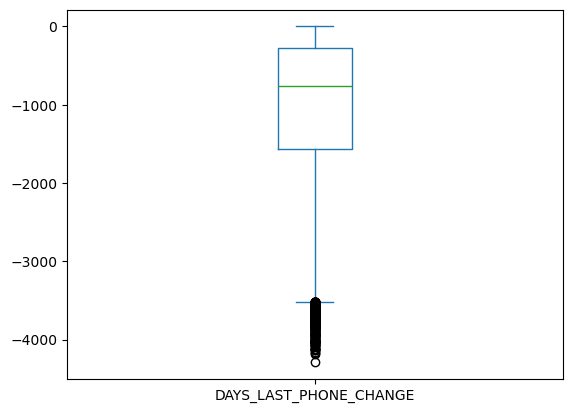

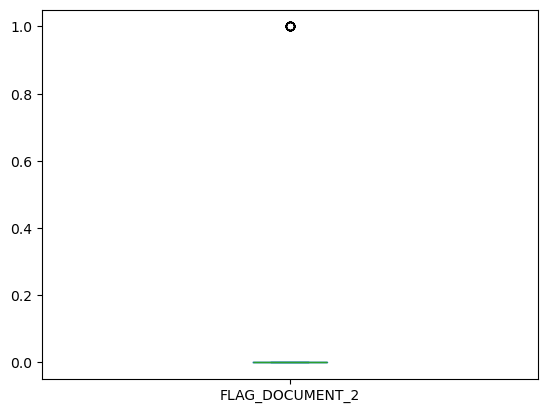

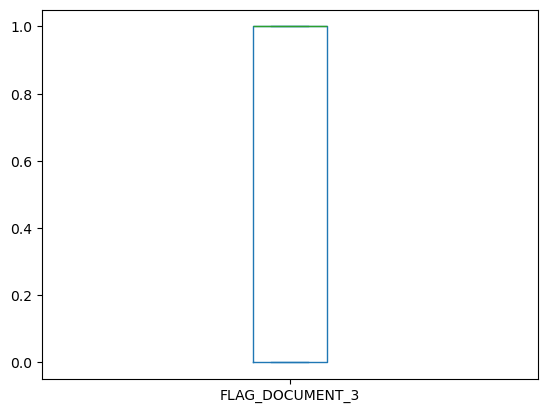

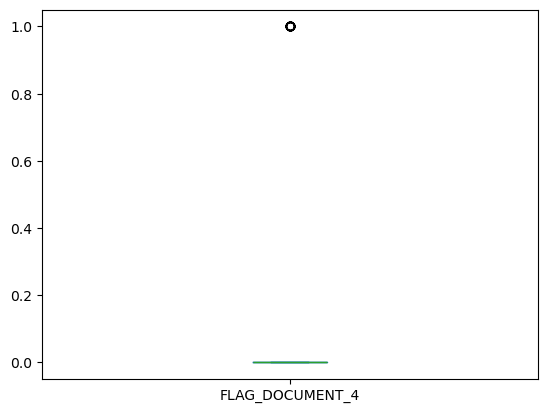

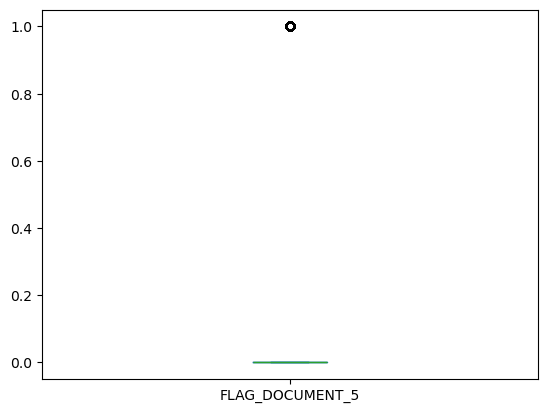

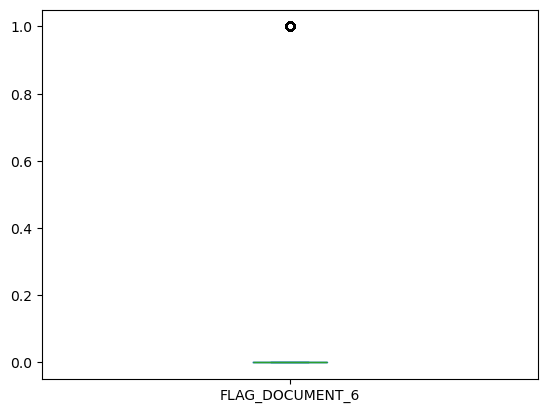

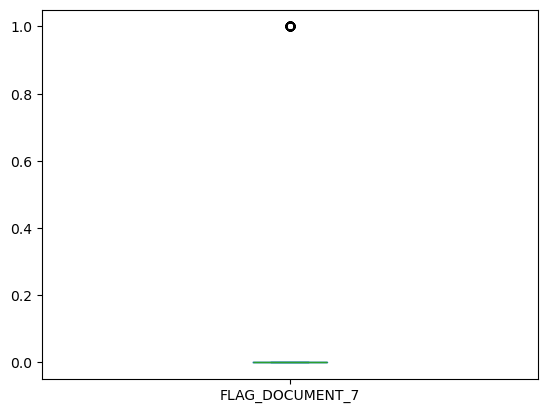

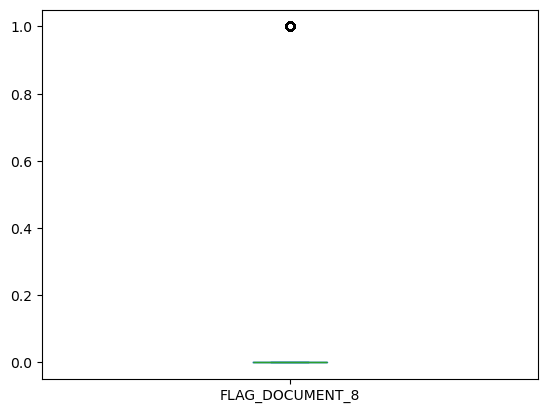

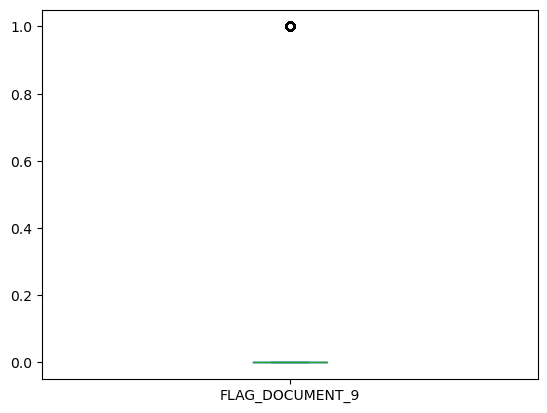

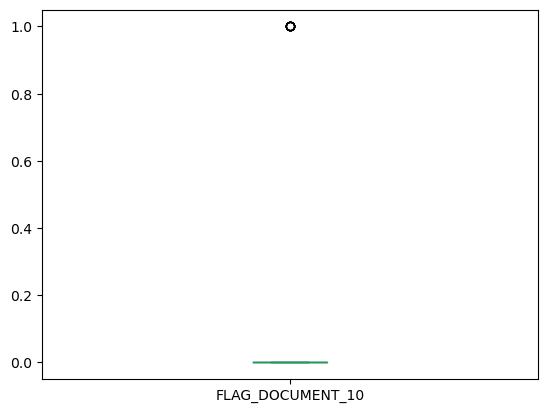

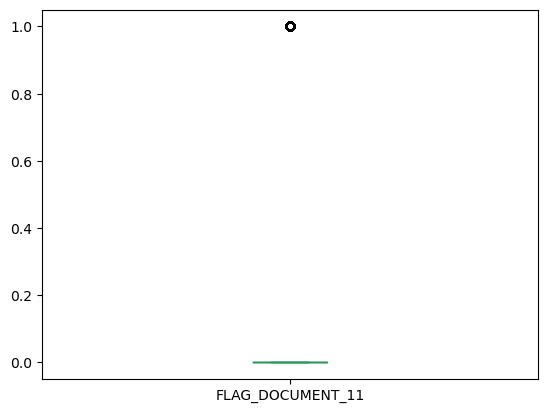

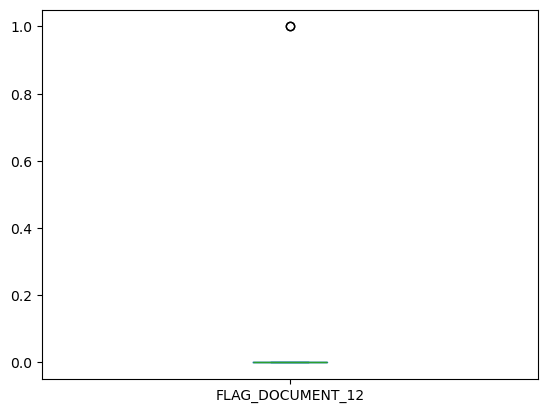

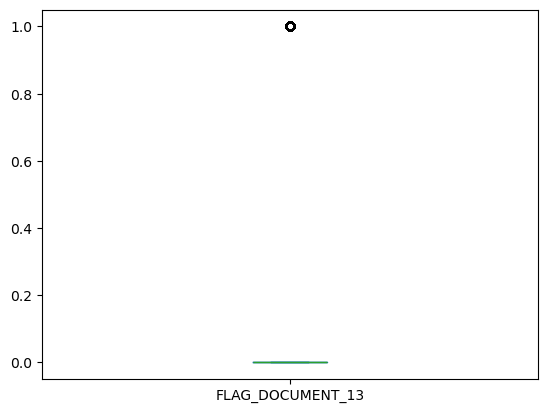

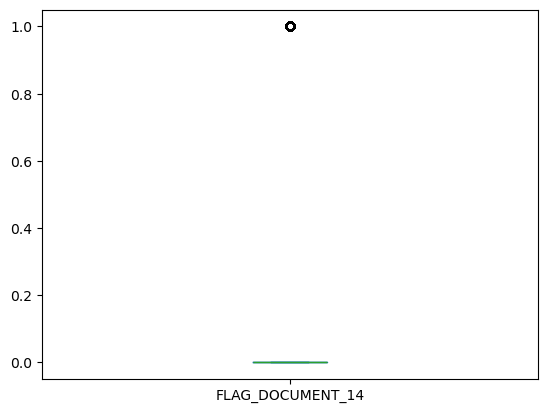

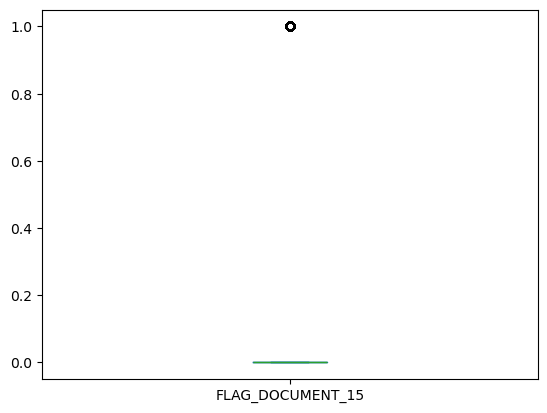

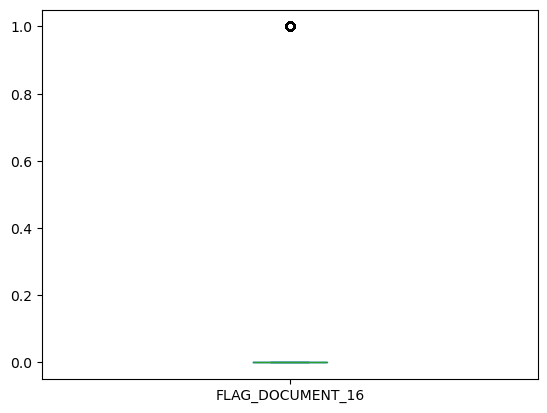

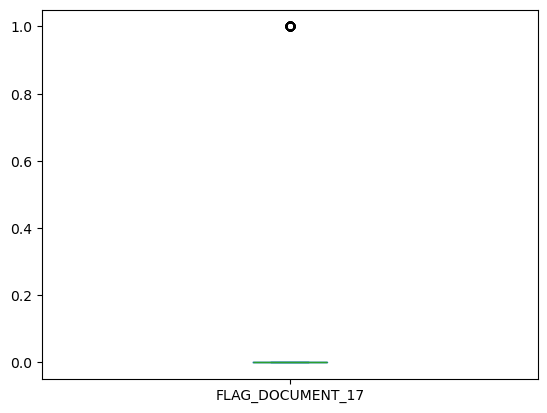

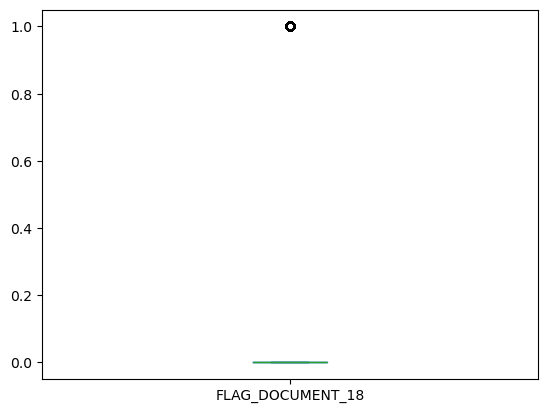

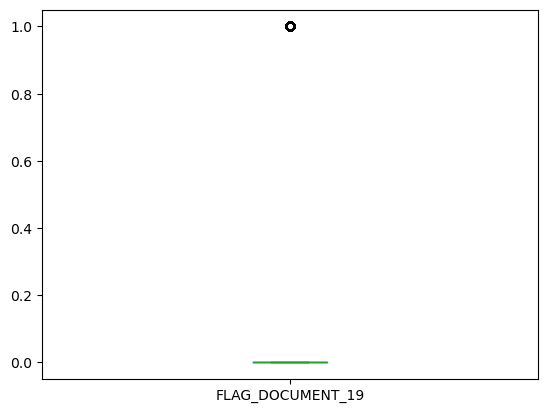

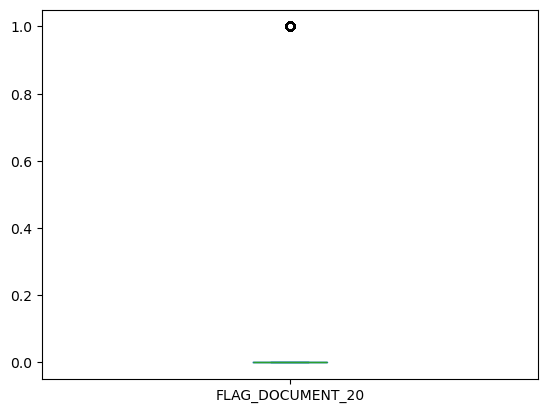

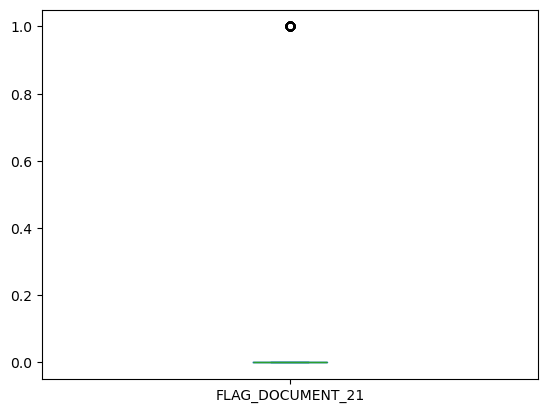

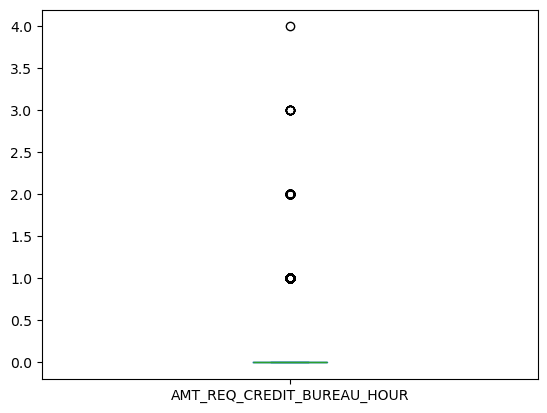

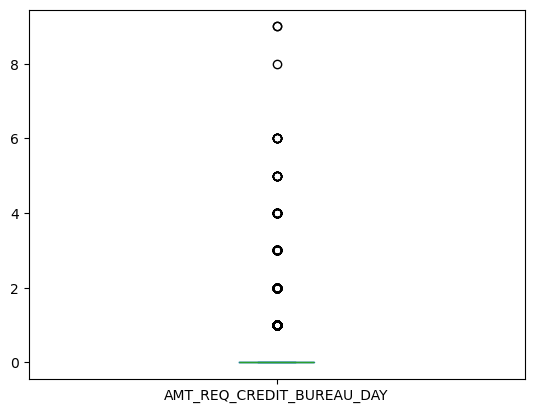

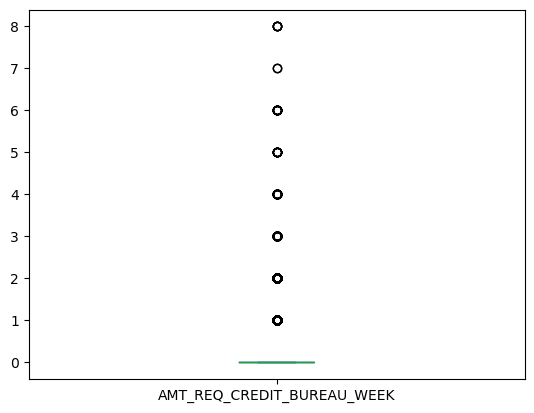

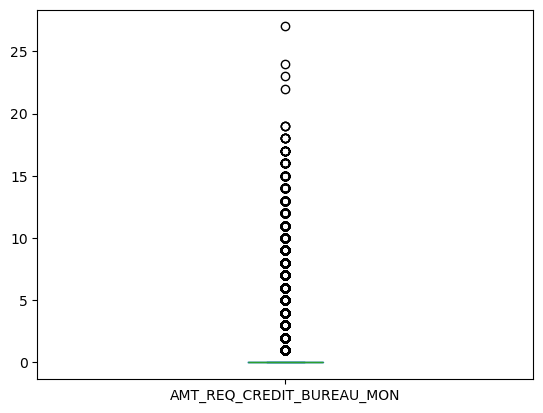

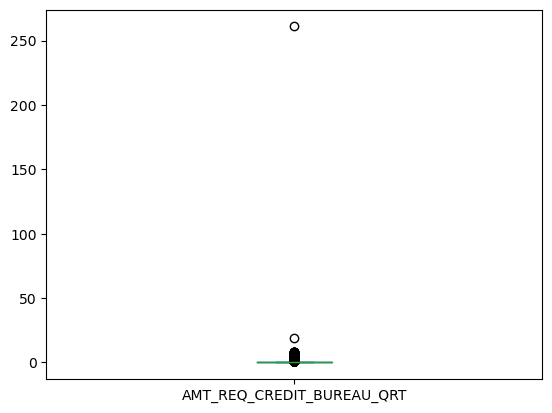

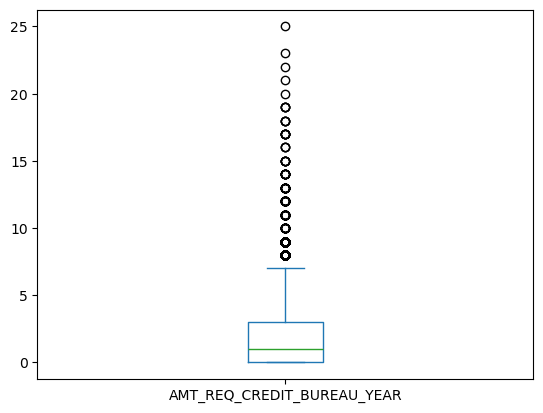

TARGET                         None
CNT_CHILDREN                   None
AMT_INCOME_TOTAL               None
AMT_CREDIT                     None
AMT_ANNUITY                    None
REGION_POPULATION_RELATIVE     None
DAYS_BIRTH                     None
DAYS_EMPLOYED                  None
DAYS_REGISTRATION              None
DAYS_ID_PUBLISH                None
FLAG_MOBIL                     None
FLAG_EMP_PHONE                 None
FLAG_WORK_PHONE                None
FLAG_CONT_MOBILE               None
FLAG_PHONE                     None
FLAG_EMAIL                     None
REGION_RATING_CLIENT           None
HOUR_APPR_PROCESS_START        None
REG_REGION_NOT_LIVE_REGION     None
LIVE_REGION_NOT_WORK_REGION    None
REG_CITY_NOT_LIVE_CITY         None
REG_CITY_NOT_WORK_CITY         None
EXT_SOURCE_2                   None
EXT_SOURCE_3                   None
OBS_60_CNT_SOCIAL_CIRCLE       None
DEF_60_CNT_SOCIAL_CIRCLE       None
DAYS_LAST_PHONE_CHANGE         None
FLAG_DOCUMENT_2             

In [20]:
app.select_dtypes(['int','float']).apply(plot_)

In [21]:
describe = app.select_dtypes(['int','float']).describe(include = 'all').T
describe.loc[:,['min','25%','mean','75%','max']].T

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.00813,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [22]:
def outlier_treat(df):
    col = ['AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','CNT_CHILDREN','DAYS_REGISTRATION']
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lc = q1-1.5*iqr
        uc = q3+1.5*iqr

        df[i]=np.where(df[i]<lc,lc,df[i])
        df[i]=np.where(df[i]>uc,uc,df[i])

    return df

In [23]:
app = outlier_treat(app)

#### Converting categorical columns into continuous 

In [25]:
app.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             307511 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 10  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(11)
memory usage: 25.8+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label = {}
for i in app.select_dtypes('object'):
    le = LabelEncoder()
    app[i] = le.fit_transform(app[i])
    d = dict(zip(le.classes_,sorted(app[i].unique())))
    label.update(d)

In [28]:
print(label)

{'Cash loans': 0, 'Revolving loans': 1, 'F': 11, 'M': 1, 'N': 0, 'Y': 1, 'Children': 0, 'Family': 1, 'Group of people': 2, 'Other_A': 3, 'Other_B': 4, 'Spouse, partner': 5, 'Unaccompanied': 6, 'Businessman': 0, 'Commercial associate': 1, 'Maternity leave': 2, 'Pensioner': 3, 'State servant': 4, 'Student': 5, 'Unemployed': 6, 'Working': 7, 'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4, 'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Unknown': 4, 'Widow': 5, 'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5, 'FRIDAY': 0, 'MONDAY': 1, 'SATURDAY': 2, 'SUNDAY': 3, 'THURSDAY': 4, 'TUESDAY': 5, 'WEDNESDAY': 6, 'Advertising': 0, 'Agriculture': 1, 'Bank': 2, 'Business Entity Type 1': 3, 'Business Entity Type 2': 4, 'Business Entity Type 3': 5, 'Cleaning': 6, 'Construction': 7, 'Culture': 8, 'Electrici

#### Seprating 'x' variable & 'y' variable

In [30]:
app.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0.0,202500.0,406597.5,24700.5,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
x = app.iloc[:,1:]
y = app.loc[:,['TARGET']]

#### Data Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.324395,1.388176,-0.717914,0.664531,-0.59592,0.142129,-0.488320,-0.157910,0.438339,0.915580,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719
1,-0.324395,-0.720370,-0.717914,-1.504820,-0.59592,0.426792,1.843704,0.670174,-2.382339,-0.263424,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565


### Applying PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=15)  # or specify a variance threshold
x2 = pca.fit_transform(x1)

In [38]:
x2 = pd.DataFrame(x2)

#### Train & Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
app['TARGET'].value_counts()/app.shape[0] #Imbalanced Dataset

TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,stratify=y,random_state=20)

In [43]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((246008, 15), (61503, 15), (246008, 1), (61503, 1))

#### Model Training

##### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
pred = lr.predict(xtest)

In [49]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Metrics 

In [51]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report

In [52]:
acc = accuracy_score(ytest,pred)
pre = precision_score(ytest,pred)
rec = recall_score(ytest,pred)
print(acc, pre, rec)

0.9191909337755881 0.2222222222222222 0.0004028197381671702


In [53]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.22      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.57      0.50      0.48     61503
weighted avg       0.86      0.92      0.88     61503



##### The model appears to be overfitting to the majority class.

#### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3)

In [58]:
pred1 = rf.predict(xtest)

In [59]:
acc = accuracy_score(ytest,pred1)
pre = precision_score(ytest,pred1)
rec = recall_score(ytest,pred1)
print(acc, pre, rec)

0.9192722306228964 0.0 0.0


In [60]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [61]:
# Checking accuracy score at diffrent-diffrent depth
accuracy_scores = []
max_depths = []

for i in range(5, 1, -1):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(xtrain, ytrain)
    pred1 = rf.predict(xtest)
    
    acc = accuracy_score(ytest, pred1)
    
    accuracy_scores.append(acc)
    max_depths.append(i)

In [64]:
accuracy_scores,max_depths

([0.9192722306228964,
  0.9192722306228964,
  0.9192722306228964,
  0.9192722306228964],
 [5, 4, 3, 2])

## Random Sampling

In [68]:
app['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [69]:
T = app[app['TARGET'] == 1]

In [70]:
F = app[app['TARGET'] == 0]

In [71]:
T.shape,F.shape

((24825, 64), (282686, 64))

In [72]:
F = F.sample(24825)

In [73]:
app1 = pd.concat([T,F]).reset_index(drop = True)

In [74]:
app1['TARGET'].value_counts()

TARGET
1    24825
0    24825
Name: count, dtype: int64

In [75]:
x = app1.iloc[:,1:]
y = app1.loc[:,['TARGET']]

In [76]:
ss = StandardScaler()
x1 = ss.fit_transform(x)
x1 = pd.DataFrame(x1)
x1.columns = x.columns
x1.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.29946,1.270318,-0.699845,0.670327,-0.615254,0.065725,-0.463308,-0.147608,0.428245,0.840555,...,-0.082048,-0.023754,-0.021055,-0.021528,-0.071129,-0.062498,-0.158053,-0.266311,-0.380842,-0.352765
1,-0.29946,-0.787204,-0.699845,0.670327,-0.615254,-0.103315,1.129661,0.039055,0.428245,0.840555,...,-0.082048,-0.023754,-0.021055,-0.021528,-0.071129,-0.062498,-0.158053,-0.266311,3.026764,0.174392


#### Appliying PCA

In [80]:
pca = PCA(n_components=15) 
x2 = pca.fit_transform(x1)

In [81]:
x2 = pd.DataFrame(x2)

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=20)

In [83]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((39720, 15), (9930, 15), (39720, 1), (9930, 1))

#### Logistic Regression

In [85]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [86]:
pred = lr.predict(xtest)

#### Metrics

In [89]:
acc = accuracy_score(ytest,pred)
pre = precision_score(ytest,pred)
rec = recall_score(ytest,pred)
print(acc, pre, rec)

0.6473313192346425 0.6457917830075788 0.6522965350523772


In [90]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      4966
           1       0.65      0.65      0.65      4964

    accuracy                           0.65      9930
   macro avg       0.65      0.65      0.65      9930
weighted avg       0.65      0.65      0.65      9930



#### Random Forest

In [92]:
# Checking accuracy score at diffrent-diffrent depth
accuracy_scores = []
max_depths = []

for i in range(20, 1, -1):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(xtrain, ytrain)
    pred1 = rf.predict(xtest)
    
    acc = accuracy_score(ytest, pred1)
    
    accuracy_scores.append(acc)
    max_depths.append(i)

In [167]:
accuracy_scores,max_depths

([0.6468277945619335,
  0.6430010070493454,
  0.6473313192346425,
  0.6462235649546828,
  0.6503524672708962,
  0.6479355488418933,
  0.6510574018126888,
  0.6504531722054381,
  0.6529707955689829,
  0.6522658610271903,
  0.6470292044310171,
  0.649546827794562,
  0.6484390735146022,
  0.6467270896273918,
  0.6452165156092649,
  0.641792547834844,
  0.641289023162135,
  0.6415911379657603,
  0.6302114803625377],
 [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2])

In [153]:
rf = RandomForestClassifier(max_depth=11)
rf.fit(xtrain, ytrain)
pred1 = rf.predict(xtest)

In [163]:
acc = accuracy_score(ytest,pred1)
pre = precision_score(ytest,pred1)
rec = recall_score(ytest,pred1)
print(acc, pre, rec)

0.6526686807653576 0.6544972465837242 0.6464544721998389


In [161]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65      4966
           1       0.65      0.65      0.65      4964

    accuracy                           0.65      9930
   macro avg       0.65      0.65      0.65      9930
weighted avg       0.65      0.65      0.65      9930

